In [8]:
# %matplotlib ipympl
from pathlib import Path
import os
import numpy as np
from dataclasses import asdict
import matplotlib.pyplot as plt
from echospec.utils.units import Units as u
from echospec.utils.parameters import Parameters


In [9]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np

mpl.rcParams.update({
    # Fonts (PRL / Nature-like)
    "font.family": "serif",
    "font.serif": ["Times New Roman", "Times", "Computer Modern Roman"],
    "mathtext.fontset": "cm",

    # Font sizes
    "font.size": 11,
    "axes.titlesize": 12,
    "axes.labelsize": 11,
    "xtick.labelsize": 10,
    "ytick.labelsize": 10,
    "legend.fontsize": 10,

    # Axes appearance
    "axes.linewidth": 1.0,
    "axes.edgecolor": "black",
    "axes.labelpad": 4,

    # Ticks
    "xtick.direction": "in",
    "ytick.direction": "in",
    "xtick.major.size": 4,
    "ytick.major.size": 4,
    "xtick.minor.size": 2,
    "ytick.minor.size": 2,
    "xtick.major.width": 0.8,
    "ytick.major.width": 0.8,
    "xtick.minor.width": 0.6,
    "ytick.minor.width": 0.6,

    # Colorbar
    "image.cmap": "viridis_r",

    # Figure
    "figure.dpi": 300,
    "savefig.dpi": 300,
    "savefig.bbox": "tight",
})

In [10]:

data_dir = Path(os.getcwd())/'data'/'2d_sweep'
no_echo_file = data_dir/'no_echo'/'spectroscopy_data.npz'
echo_file = data_dir/'echo.npy'

# data = np.load('filename.npy')

In [11]:

data = np.load(no_echo_file, allow_pickle=True)
print(data.files)


params = data['params'].item()

params = Parameters(params)

['detunings', 'amplitudes', 'cutoff_vector', 'fwhm_matrix', 'snr_matrix', 'options', 'params']


In [12]:
cutoff_vector = data['cutoff_vector']
amplitudes = data['amplitudes']
fwhm_matrix = data['fwhm_matrix']
snr_matrix = data['snr_matrix']



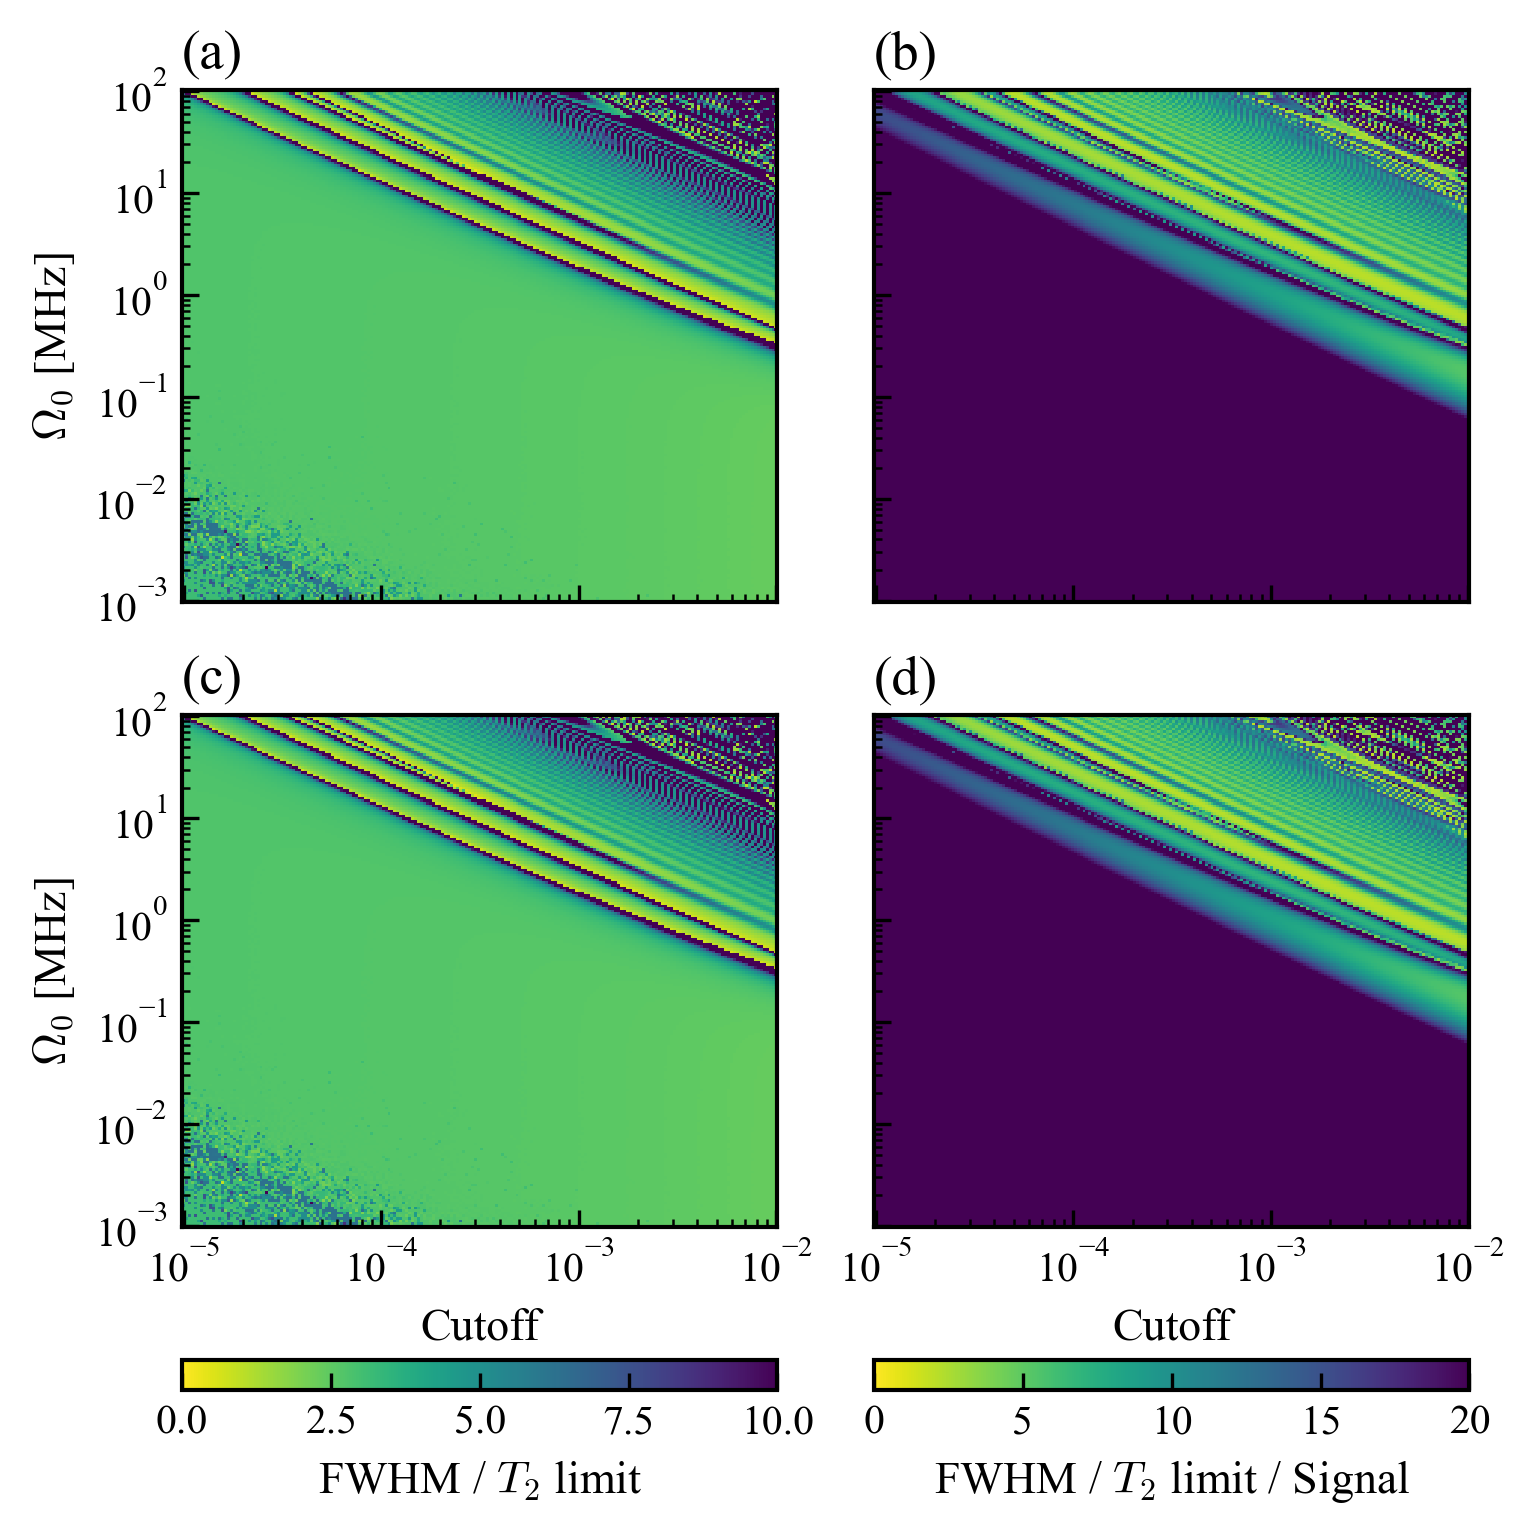

In [53]:
fig, axs = plt.subplots(
    2, 2,
    figsize=(5, 5.0),
    constrained_layout=True,
    sharex=True,
    sharey=True,
)

mat1 = np.array(fwhm_matrix).T / params.T2_limit / (2 * np.pi)
mat2 = mat1 / snr_matrix.T

Y = amplitudes / u.pi2 / u.MHz

# ---------- ROW 1 ----------
# (a) FWHM
c1 = axs[0, 0].pcolormesh(
    cutoff_vector, Y, mat1,
    shading="auto",
    vmin=0, vmax=10,
)
axs[0, 0].set_xscale("log")
axs[0, 0].set_yscale("log")
axs[0, 0].set_ylabel(r"$\Omega_0$ [MHz]")


# (b) FWHM / Signal
c2 = axs[0, 1].pcolormesh(
    cutoff_vector, Y, mat2,
    shading="auto",
    vmin=0, vmax=20,
)
axs[0, 1].set_xscale("log")
axs[0, 1].set_yscale("log")


# ---------- ROW 2 (same data, same style) ----------
# (c) FWHM
c3 = axs[1, 0].pcolormesh(
    cutoff_vector, Y, mat1,
    shading="auto",
    vmin=0, vmax=10,
)
axs[1, 0].set_xscale("log")
axs[1, 0].set_yscale("log")
axs[1, 0].set_xlabel(r"Cutoff")
axs[1, 0].set_ylabel(r"$\Omega_0$ [MHz]")


# (d) FWHM / Signal
c4 = axs[1, 1].pcolormesh(
    cutoff_vector, Y, mat2,
    shading="auto",
    vmin=0, vmax=20,
)
axs[1, 1].set_xscale("log")
axs[1, 1].set_yscale("log")
axs[1, 1].set_xlabel(r"Cutoff")

cb3 = fig.colorbar(
    c3,
    ax=axs[1, 0],
    orientation="horizontal",
    location="bottom",
    pad=0.02,
    fraction=0.1,
)
cb3.set_label(r"FWHM / $T_2$ limit")
cb4 = fig.colorbar(
    c4,
    ax=axs[1, 1],
    orientation="horizontal",
    location="bottom",
    pad=0.02,
    fraction=0.1,
)
cb4.set_label(r"FWHM / $T_2$ limit / Signal")

# Minor ticks everywhere
for ax in axs.flat:
    ax.minorticks_on()



# Add subplot labels (a), (b), (c), (d) in the upper left corner outside the plot
labels = ['(a)', '(b)', '(c)', '(d)']
positions = [(0, 0), (0, 1), (1, 0), (1, 1)]
for label, (i, j) in zip(labels, positions):
    axs[i, j].annotate(
        label,
        xy=(0, 1.02),
        xycoords='axes fraction',
        ha='left',
        va='bottom',
        fontsize='large',
        # fontweight='bold'
    )
    
plt.savefig(
    "spectroscopy_fwhm_snr_vs_amplitude_vs_cutoff_2x2.png",
    dpi=300,
)
plt.show()

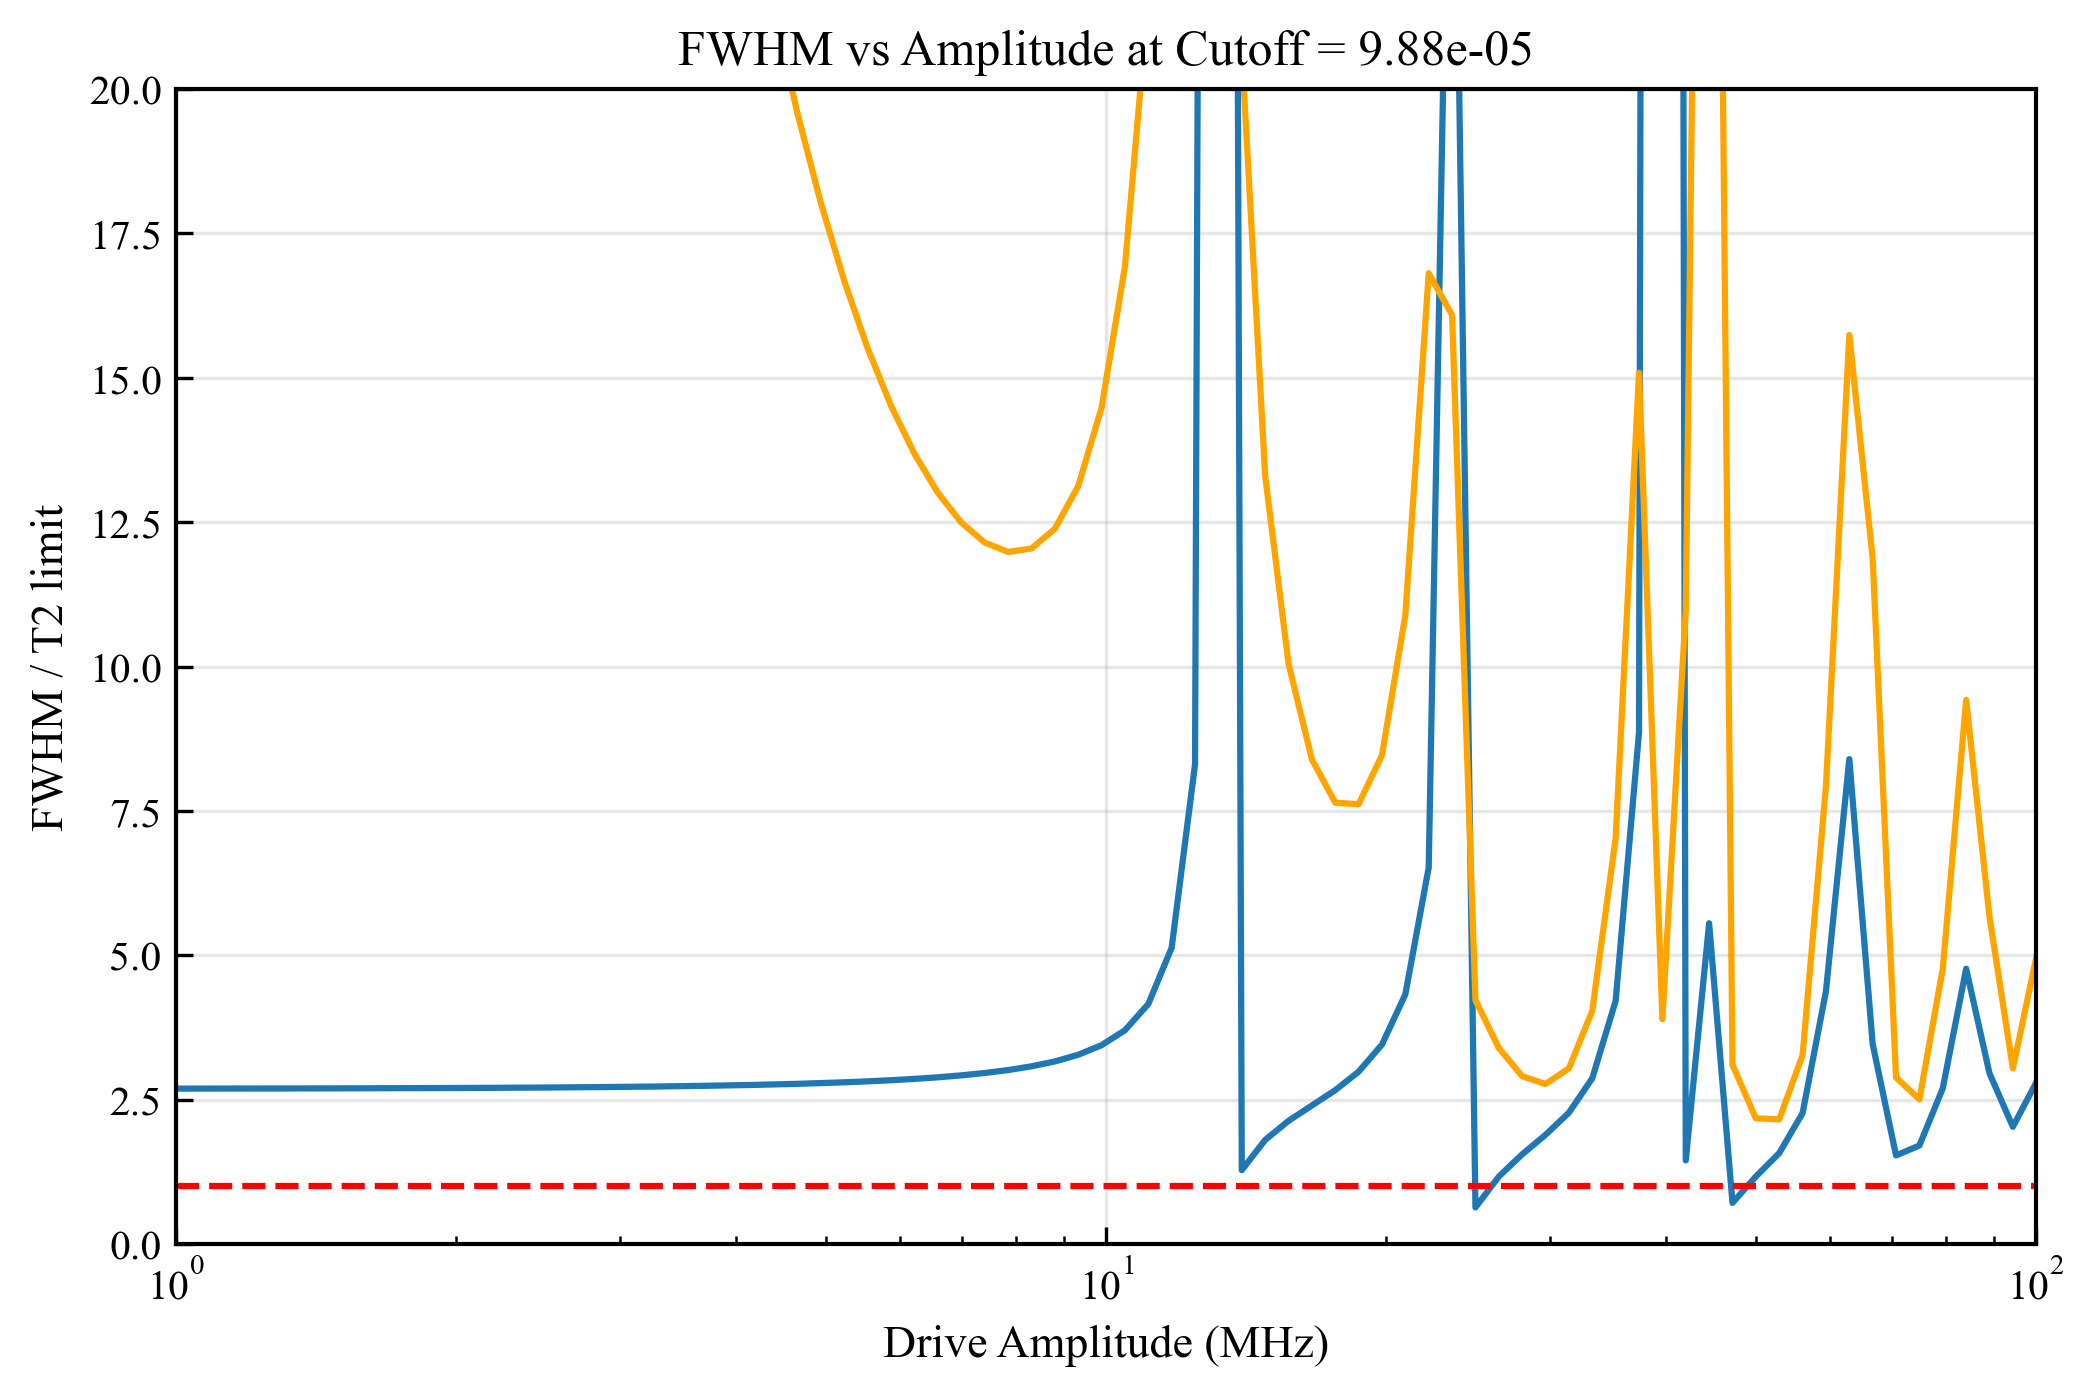

In [14]:
# Select a cutoff index (e.g., middle of the range)
cutoff_idx = len(cutoff_vector)* 2 // 3 
cutoff = cutoff_vector[cutoff_idx]

fwhm_vector = fwhm_matrix[cutoff_idx, :]/ params.T2_limit / 2 / np.pi
snr_vector = fwhm_vector /snr_matrix[cutoff_idx, :]

# Plot FWHM vs Amplitude for this constant cutoff
plt.figure(figsize=(8, 5))
plt.plot(amplitudes / u.pi2 / u.MHz, fwhm_vector)
plt.plot(amplitudes / u.pi2 / u.MHz, snr_vector, label='SNR', color='orange')
plt.xscale('log')
plt.xlabel('Drive Amplitude (MHz)')
plt.ylabel('FWHM / T2 limit')
plt.title(f'FWHM vs Amplitude at Cutoff = {cutoff_vector[cutoff_idx]:.2e}')
plt.grid(True, alpha=0.3)
plt.ylim(0, 20)
plt.xlim(1, 1e2)
plt.axhline(1, color='red', linestyle='--', label='T2 limit')
plt.show()